In [1]:
import pandas as pd 
df=pd.read_csv("c2c_project.csv")

In [3]:
df.head(5)
print(df.head)

<bound method NDFrame.head of                     emp_title  emp_length state homeownership  annual_income  \
0     global config engineer          3.0    NJ      MORTGAGE        90000.0   
1      warehouse office clerk        10.0    HI          RENT        40000.0   
2                    assembly         3.0    WI          RENT        40000.0   
3            customer service         1.0    PA          RENT        30000.0   
4        security supervisor         10.0    CA          RENT        35000.0   
...                       ...         ...   ...           ...            ...   
9995                   owner         10.0    TX          RENT       108000.0   
9996                 director         8.0    PA      MORTGAGE       121000.0   
9997                toolmaker        10.0    CT      MORTGAGE        67000.0   
9998                  manager         1.0    WI      MORTGAGE        80000.0   
9999       operations analyst         3.0    CT          RENT        66000.0   

      ver

In [11]:
df['target']=df['delinq_2y'].apply(lambda x:1 if x > 0 else 0)
print("\ntarget distribution")
print(df['target'].value_counts())
print("\ntarget distribution")
print(df['target'].value_counts(normalize=True)*100)


target distribution
target
0    8576
1    1424
Name: count, dtype: int64

target distribution
target
0    85.76
1    14.24
Name: proportion, dtype: float64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

<Figure size 600x400 with 0 Axes>

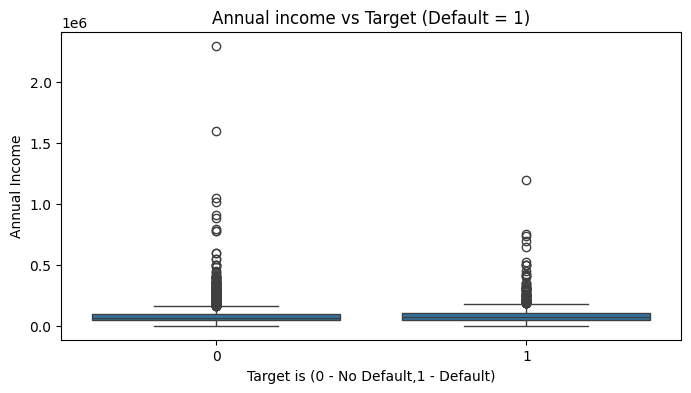

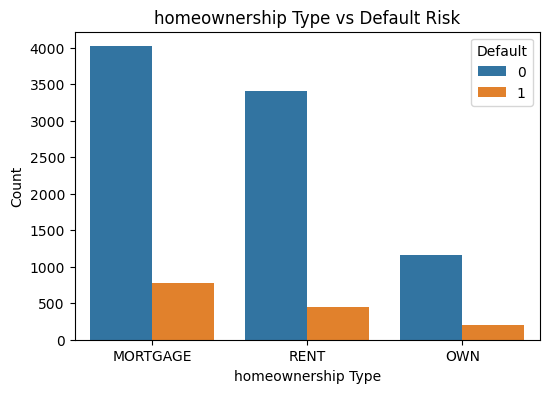

In [13]:
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
print(df.info())
print(df.describe())
print(df.isnull().sum().sort_values(ascending=False))
print(df['target'].value_counts(normalize=True)* 100)
plt.figure(figsize=(8,4))
sns.boxplot(x='target',y='annual_income',data=df)
plt.title("Annual income vs Target (Default = 1)")
plt.xlabel("Target is (0 - No Default,1 - Default)")
plt.ylabel("Annual Income")
plt.show()
plt.figure(figsize=(6,4))
sns.countplot(x='homeownership', hue='target' , data=df)
plt.title("homeownership Type vs Default Risk")
plt.xlabel("homeownership Type")
plt.ylabel("Count")
plt.legend(title='Default')
plt.show()

In [14]:
df_cleaned = df.drop(columns= ['loan_Id' , 'paid_total' , 'paid_principal' , 'paid_interest', 'issue_month' , 'loan_purpose', 'earliest_credit_line'], errors='ignore')

In [16]:
num_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

In [21]:
cat_cols = df_cleaned.select_dtypes(include='object').columns
df_cleaned = pd.get_dummies(df_cleaned, columns=cat_cols, drop_first=True)

In [22]:
print(df_cleaned.isnull().sum().sum())

0


In [23]:
print(df_cleaned.shape)

(10000, 4879)


In [24]:
print(df_cleaned.head())

   emp_length  annual_income  debt_to_income  annual_income_joint  \
0         3.0        90000.0           18.01             113000.0   
1        10.0        40000.0            5.04             113000.0   
2         3.0        40000.0           21.15             113000.0   
3         1.0        30000.0           10.16             113000.0   
4        10.0        35000.0           57.96              57000.0   

   debt_to_income_joint  delinq_2y  months_since_last_delinq  \
0                 19.72          0                      38.0   
1                 19.72          0                      34.0   
2                 19.72          0                      28.0   
3                 19.72          0                      34.0   
4                 37.66          0                      34.0   

   inquiries_last_12m  total_credit_lines  open_credit_lines  ...  \
0                   6                  28                 10  ...   
1                   1                  30                 14  

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
X=df_cleaned.drop(columns=['target'])
Y=df_cleaned['target']

In [31]:
X_train,X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42, stratify=Y)
print("Training set shape",X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape (8000, 4878)
Test set shape: (2000, 4878)


In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
import numpy as np
from sklearn.linear_model import LogisticRegression

print("\nMean of first 5 features after scaling (train):", np.mean(X_train_scaled[:, :5], axis=0))
print("Std of first 5 features after scaling (train):", np.std(X_train_scaled[:, :5], axis=0))


Mean of first 5 features after scaling (train): [ 6.90558721e-17  8.78186412e-17 -1.52322599e-16  2.96207503e-16
 -2.36521913e-15]
Std of first 5 features after scaling (train): [1. 1. 1. 1. 1.]


In [38]:
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [39]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [42]:
train_accuracy = log_reg.score(X_train_scaled, y_train)

print(f" Training Accuracy: {train_accuracy:.4f}")

 Training Accuracy: 1.0000


In [43]:
coefficients = pd.DataFrame({

    'Feature': X.columns,

    'Coefficient': log_reg.coef_[0]

}).sort_values(by='Coefficient', ascending=False)

 

print("\nTop 10 Positive Coefficients (Increase Default Risk):")

print(coefficients.head(10))

 

print("\nTop 10 Negative Coefficients (Decrease Default Risk):")

print(coefficients.tail(10))


Top 10 Positive Coefficients (Increase Default Risk):
                        Feature  Coefficient
5                     delinq_2y     6.035306
12     num_collections_last_12m     0.268900
4792                   state_KS     0.233464
4821                   state_VA     0.156701
23    num_active_debit_accounts     0.155315
4854               sub_grade_D1     0.128584
10           total_credit_limit     0.119602
8            total_credit_lines     0.113759
4872     loan_status_Fully Paid     0.112556
4830   verified_income_Verified     0.108866

Top 10 Negative Coefficients (Decrease Default Risk):
                               Feature  Coefficient
4856                      sub_grade_D3    -0.090123
4874     loan_status_Late (16-30 days)    -0.092997
3482       emp_title_registered nurse     -0.098170
4851                      sub_grade_C3    -0.114461
19    months_since_last_credit_inquiry    -0.116321
24                   total_debit_limit    -0.197880
18                 accounts_ope

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import matplotlib.pyplot as plt

In [45]:
y_pred = log_reg.predict(X_test_scaled)

y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # probability of default

In [46]:
test_accuracy = accuracy_score(y_test, y_pred)

In [47]:
cm = confusion_matrix(y_test, y_pred)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1715
           1       1.00      1.00      1.00       285

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



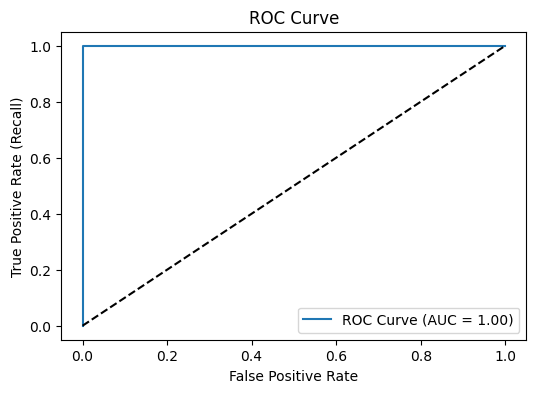

In [52]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')  # diagonal line

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate (Recall)")

plt.title("ROC Curve")

plt.legend()

plt.show()